<h2 align="right">Case Study 4</h2> 
<h1 align="center">Case Study on Testing of Hypothesis</h1><br/>
<h2>Objectives :</h2><br>
A company started to invest in digital marketing as a new way of their product
promotions.For that they collected data and decided to carry out a study on it (dataset: Sales_add.csv). 

<ul>
<li>The company wishes to clarify whether there is any increase in sales after
stepping into digital marketing.
</li>
<li>The company needs to check whether there is any dependency between the
features “Region” and “Manager”.</li>
</ul>
Help the company to carry out their study with the help of data provided.
<br/>
<br/>


In [75]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats import ttest_ind

In [61]:
#read dataset to pandas dataframe
data = pd.read_csv('Sales_add.csv')
data.head()

,Month,Region,Manager,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
0,Month-1,Region - A,Manager - A,132921,270390
1,Month-2,Region - A,Manager - C,149559,223334
2,Month-3,Region - B,Manager - A,146278,244243
3,Month-4,Region - B,Manager - B,152167,231808
4,Month-5,Region - C,Manager - B,159525,258402


In [62]:
data.shape

(22, 5)

In [63]:
data.describe()

,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
count,22.000000,22.000000
mean,149239.954545,231123.727273
std,14844.042921,25556.777061
min,130263.000000,187305.000000
25%,138087.750000,214960.750000
50%,147444.000000,229986.500000
75%,157627.500000,250909.000000
max,178939.000000,276279.000000


In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Month                           22 non-null     object
 1   Region                          22 non-null     object
 2   Manager                         22 non-null     object
 3   Sales_before_digital_add(in $)  22 non-null     int64 
 4   Sales_After_digital_add(in $)   22 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 1008.0+ bytes


# - Clarify whether there is any increase in sales after stepping into digital marketing.

In [65]:
data[['Sales_before_digital_add(in $)', 'Sales_After_digital_add(in $)']]

,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
0,132921,270390
1,149559,223334
2,146278,244243
3,152167,231808
4,159525,258402
5,137163,256948
6,130625,222106
7,131140,230637
8,171259,226261
9,141956,193735


In [66]:
data[['Sales_before_digital_add(in $)', 'Sales_After_digital_add(in $)']].describe()

,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
count,22.000000,22.000000
mean,149239.954545,231123.727273
std,14844.042921,25556.777061
min,130263.000000,187305.000000
25%,138087.750000,214960.750000
50%,147444.000000,229986.500000
75%,157627.500000,250909.000000
max,178939.000000,276279.000000


Let's perform a hypothesis test using the following hypotheses:
<ul>
<li><b>H0 :</b> μafter = μbefore (the mean sales is the same before and after spending more on advertising)</li>
    <li><b>HA :</b> μafter > μbefore (the mean sales increased after spending more on advertising)</li>
</ul>

In [40]:
ttest_ind(data['Sales_After_digital_add(in $)'], data['Sales_before_digital_add(in $)'], equal_var = False, alternative='greater')

Ttest_indResult(statistic=12.995084451110877, pvalue=5.509835809804302e-15)

#### t-score: 12.995
#### p value: 0.00
#### Here the p-value of the test is less than the significance level (0.05), then the company can reject the null hypothesis and conclude that increased digital advertising leads to increased sales.
<br/>
<br/>
<br/>

# - Check whether there is any dependency between the features “Region” and “Manager”.

In [67]:
dataset_table=pd.crosstab(data['Region'], data['Manager'])
dataset_table

Manager,Manager - A,Manager - B,Manager - C
Region,,,
Region - A,4,3,3
Region - B,4,1,2
Region - C,1,3,1


<AxesSubplot:xlabel='Manager', ylabel='Region'>

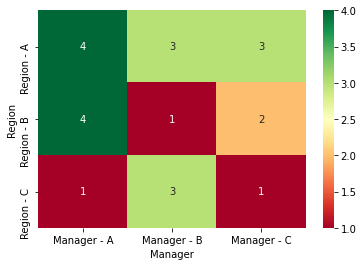

In [76]:
sns.heatmap(dataset_table, annot=True, cmap='RdYlGn')

We will be using two categorical features Region and Manager to find whether there is an association between them using the chi-square test. 
<ul>
<li><b>H0 :</b> There is no significant association between Region and Manager features.</li>
    <li><b>HA :</b> There is a significant association between Region and Manager features.</li>
</ul>

In [74]:
ddof= 4   #degree of freedom = (n-1)*(m-1)=(3-1)*(3-1)
alpha =0.05
from scipy.stats import chi2_contingency
observed=dataset_table.values
val2=chi2_contingency(pd.crosstab(data['Region'], data['Manager']))
expected=val2[3]

from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(observed,expected)])
chi_square_statistic=chi_square[0]+chi_square[1]
p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)

print("chi-square statistic:-",chi_square_statistic)

print('Significance level: ',alpha)

print('Degree of Freedom: ',ddof)

print('p-value:',p_value)

if p_value<=alpha:

    print("\nReject Null Hypothesis")

else:

    print("\nAccept Null Hypothesis")

chi-square statistic:- 2.921995464852608
Significance level:  0.05
Degree of Freedom:  4
p-value: 0.5709629929220089

Accept Null Hypothesis


#### Since the p-value is greater than 0.05, we accept the null hypothesis. We conclude that there is no significant association between the two features Region and Manager.
<br/>
<br/>
<br/>